In [7]:
import sys
sys.path.append('..')

import input_process
import pickle
import numpy as np
import time
import os
import torch
import torch.nn as nn

(128, 128)
0 1763
(256, 2000)


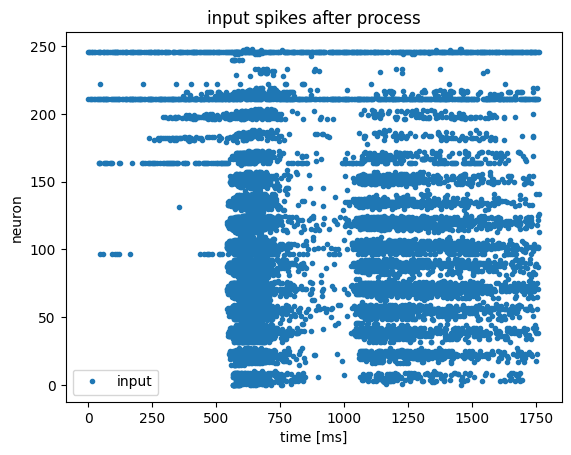

In [2]:
path = '../Experiment_Data/taps_trial_0_pose_0.pickle'
with open(path, 'rb') as file:
    data = pickle.load(file)
    print(data.shape)

data = input_process.clip_pretime(data, 2000)

array = input_process.crop(data, 2000).astype(np.int64)
input_process.plot_input(array)

In [6]:
def sum_adjacent_cols(matrix, n):
    num_cols = matrix.shape[1]
    result = torch.zeros((matrix.shape[0],int(np.ceil(num_cols/n))))
    for i in range(n):
        result += matrix[:, i:num_cols:n]
    return result

root_dir_1 = '/home/xxc/PhD/synsense/Data/mg_tap_9positions/deep_learning/train/trial_0_pose_0.npy'
with open(root_dir_1, 'rb') as f:
    data = np.load(f)

data = torch.from_numpy(data).float()
# data = torch.transpose(data, 0, 1)
print(data.shape)
data = sum_adjacent_cols(data, 10)
print(data.shape)
data = torch.transpose(data, 0, 1)      # [200, 256]
data = data.view(200, 16, 16)           # [200, 16, 16]
data = data.unsqueeze(1)                # [200, 1, 16, 16]
print(data.shape)

torch.Size([256, 2000])
torch.Size([256, 200])
torch.Size([200, 1, 16, 16])


In [13]:
model = nn.Sequential(
        nn.Conv2d(1, 8, 3, 1, bias=False),
        nn.ReLU(),
        nn.AvgPool2d(2, 2),
        nn.Conv2d(8, 16, 3, 1, bias=False),
        nn.ReLU(),
        # nn.AvgPool2d(2, 2),
        nn.Conv2d(16, 32, 3, 1, bias=False),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(288, 500, bias=False),
        nn.ReLU(),
        nn.Linear(500, 9, bias=False)
    )
a = torch.rand([200, 1, 16, 16])
b = model(a)
print(b.shape)

torch.Size([200, 9])
